In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import urllib.request as urlr
import json

import seaborn as sns
#sns.set(color_codes=True);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set(color_codes=True)

In [ ]:
import matplotlib.dates as mdates

In [ ]:
penguin = sns.load_dataset('penguins')

# Plotting Composition of data

## Static Composition

###Pie Chart

In [ ]:
s = penguin.groupby('species')['species'].count()

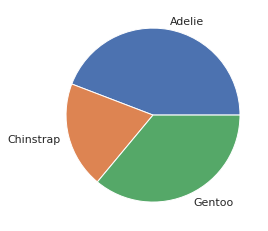

In [ ]:
plt.pie(s, labels=s.index);

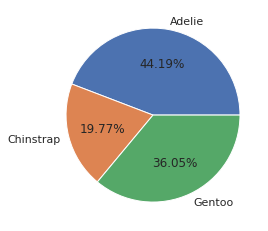

In [ ]:
plt.pie(s, labels=s.index, autopct='%.2f%%');

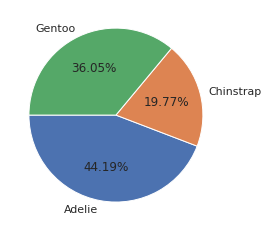

In [ ]:
plt.pie(s, labels=s.index, autopct='%.2f%%', startangle = 180);

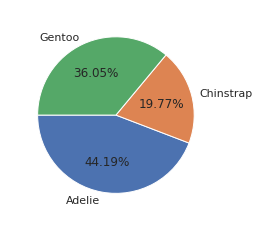

In [ ]:
plt.pie(s, labels=s.index, autopct='%.2f%%', startangle = 180 , radius = 0.9);

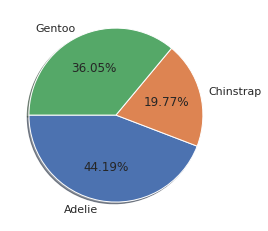

In [ ]:
plt.pie(s, labels=s.index, autopct='%.2f%%', startangle = 180, shadow =True);

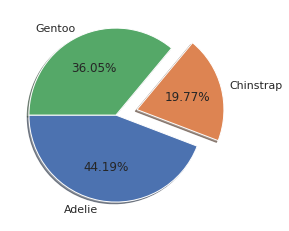

In [ ]:
plt.pie(s, labels=s.index, autopct='%.2f%%', startangle = 180, shadow =True , explode = [0,0.25,0]);

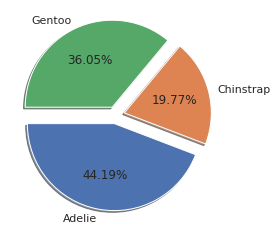

In [ ]:
plt.pie(s, labels=s.index, autopct='%.2f%%', startangle = 180, shadow =True , explode = [0.1,0.1,0.1]);

###Donut Charts

In [ ]:
i = penguin.groupby('island')['island'].count()

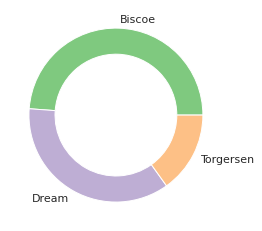

In [ ]:
plt.pie(i, labels = i.index, wedgeprops={'width':0.3}, colors = plt.get_cmap('Accent')([0,1,2,3]));

In [ ]:
plt.get_cmap('Accent')([0,1,2])

array([[0.49803922, 0.78823529, 0.49803922, 1.        ],
       [0.74509804, 0.68235294, 0.83137255, 1.        ],
       [0.99215686, 0.75294118, 0.5254902 , 1.        ]])

([<matplotlib.patches.Wedge at 0x7ff7d4f5bf98>,
 [Text(1.0969241767847684, 0.08220310447336211, ''),
  Text(1.0511300845578104, 0.32423069770996493, ''),
  Text(0.9526279387988495, 0.5500000092907776, ''),
  Text(0.4018751039768062, 1.0239611324672588, ''),
  Text(-0.7481900510938467, 0.8063570223196342, ''),
  Text(-1.0877138949597427, -0.1639465849339529, ''),
  Text(-0.6858386871455828, -0.8600147063942706, ''),
  Text(0.1639466358535144, -1.0877138872848482, ''),
  Text(0.991065834488076, -0.4772719473323923, ''),
  Text(1.0999999999999808, 2.0597886516129914e-07, '')])

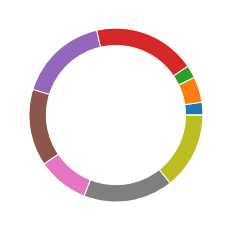

In [ ]:
plt.pie(np.random.randint(0,10,10), colors = plt.get_cmap('tab10')(np.arange(10)), wedgeprops = {'width': 0.2})

In [ ]:
ct = pd.crosstab(penguin.island,penguin.species)

In [ ]:
ct

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


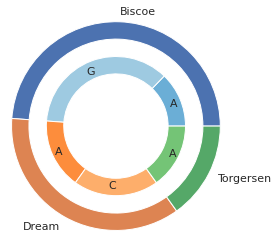

In [ ]:
plt.pie(ct.sum(axis=1),labels = ct.index, radius = 1.2, wedgeprops={'width':0.2});
plt.pie(ct.values.flatten()[np.nonzero(ct.values.flatten())], labels = ['A','G','A','C','A'],
        wedgeprops={'width':0.2},radius=0.8, labeldistance=0.85,
        colors = plt.get_cmap('tab20c')([1,2,5,6,9,10]));

In [ ]:
ct.values.flatten()[np.nonzero(ct.values.flatten())]

array([ 44, 124,  56,  68,  52])

### Stacked Bar Plots

In [ ]:
url = 'https://api.covid19india.org/states_daily.json'

In [ ]:
urlr.urlretrieve(url,'covid.json');

In [ ]:
with open('covid.json') as f:
    data = json.load(f)
data = data['states_daily']
covid = pd.DataFrame(data)

In [ ]:
covid

In [ ]:
covid = covid.tail(3)
covid.drop('date', axis=1, inplace=True)
covid.set_index('status', inplace=True)
covid = covid.T
covid.drop('tt', inplace=True)

In [ ]:
covid = covid.apply(pd.to_numeric)

''

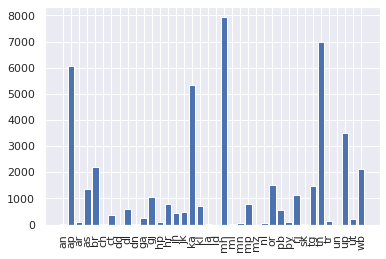

In [ ]:
plt.bar(covid.index, covid.Confirmed)
plt.xticks(rotation = 90)
;

''

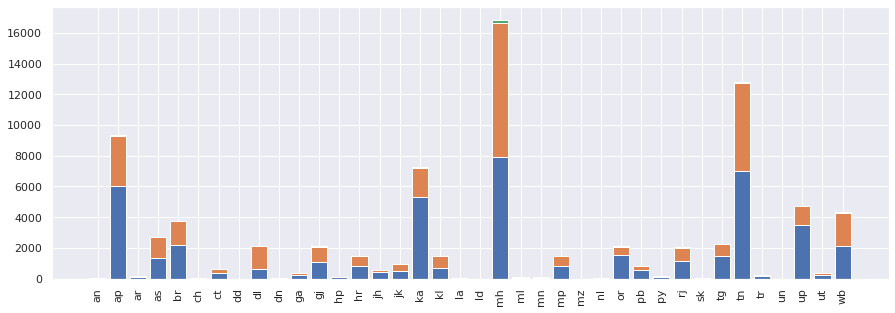

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=15, h=5)
plt.bar(covid.index, covid.Confirmed)
plt.bar(covid.index, covid.Recovered, bottom = covid.Confirmed)
plt.bar(covid.index, covid.Deceased, bottom = covid.Confirmed + covid.Recovered)
plt.xticks(rotation = 90)
;

''

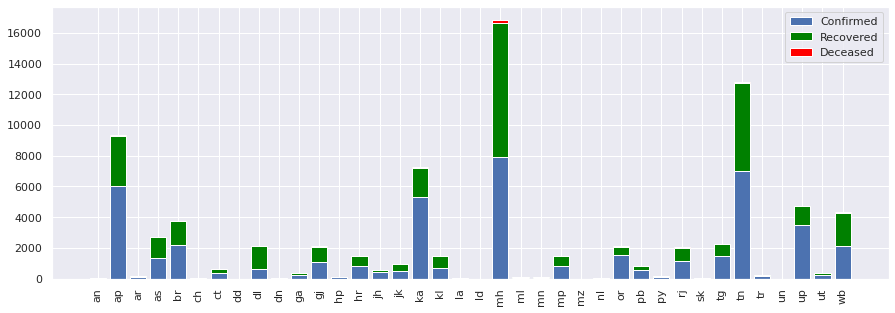

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=15, h=5)
plt.bar(covid.index, covid.Confirmed,)
plt.bar(covid.index, covid.Recovered, bottom = covid.Confirmed, color='green')
plt.bar(covid.index, covid.Deceased, bottom = covid.Confirmed + covid.Recovered, color='red')
plt.xticks(rotation = 90)
plt.legend(['Confirmed','Recovered','Deceased'])
;

''

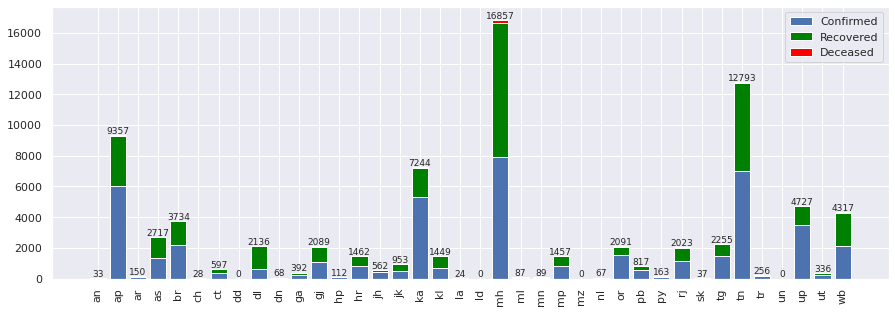

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=15, h=5)
plt.bar(covid.index, covid.Confirmed,)
plt.bar(covid.index, covid.Recovered, bottom = covid.Confirmed, color='green')
plt.bar(covid.index, covid.Deceased, bottom = covid.Confirmed + covid.Recovered, color='red')
plt.xticks(rotation = 90)
plt.legend(covid.columns.unique())
for i, val in enumerate(covid.index):
    y = covid.loc[val].sum()
    plt.text(i,y+100, str(y), ha='center', size=9)
;

### Relative Stacked Bar Plots

''

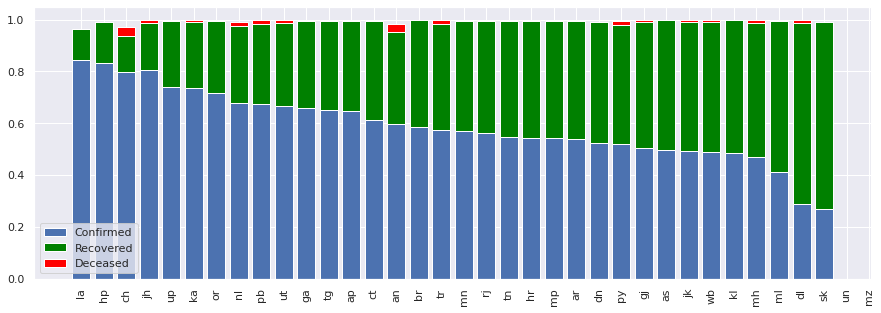

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=15, h=5)

covid['CF'] = covid.Confirmed/covid.sum(axis=1)
covid.sort_values('CF', ascending=False, inplace=True,)

plt.bar(covid.index, covid.Confirmed/covid.sum(axis=1),)
plt.bar(covid.index, covid.Recovered/covid.sum(axis=1), bottom = covid.Confirmed/covid.sum(axis=1), color='green')
plt.bar(covid.index, covid.Deceased/covid.sum(axis=1), bottom = covid.Confirmed/covid.sum(axis=1) + covid.Recovered/covid.sum(axis=1), color='red')
plt.xticks(rotation = 90)
plt.legend(['Confirmed','Recovered','Deceased'])
;

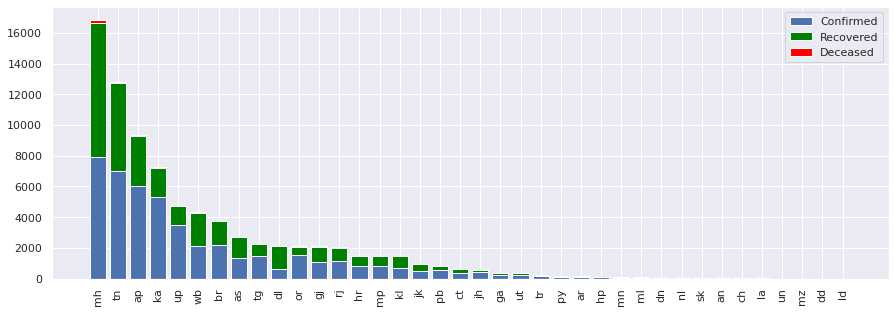

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=15, h=5)

covid['Total'] = covid.sum(axis=1)
covid.sort_values('Total', ascending=False, inplace=True,)

plt.bar(covid.index, covid.Confirmed,)
plt.bar(covid.index, covid.Recovered, bottom = covid.Confirmed, color='green')
plt.bar(covid.index, covid.Deceased, bottom = covid.Confirmed + covid.Recovered, color='red')
plt.xticks(rotation = 90)
plt.legend(covid.columns.unique())
;

''

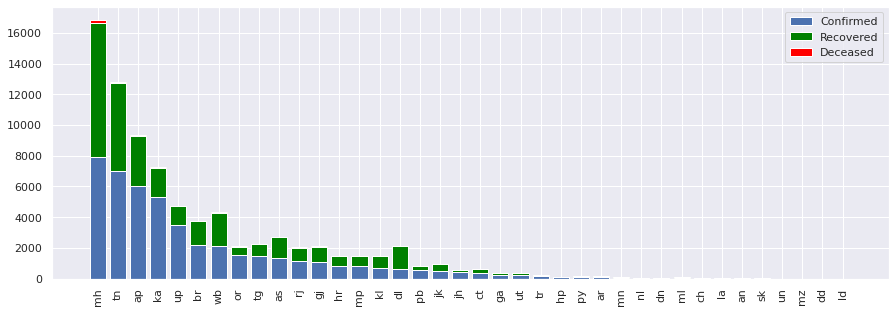

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=15, h=5)

covid['Total'] = covid.sum(axis=1)
covid.sort_values('Confirmed', ascending=False, inplace=True,)

plt.bar(covid.index, covid.Confirmed,)
plt.bar(covid.index, covid.Recovered, bottom = covid.Confirmed, color='green')
plt.bar(covid.index, covid.Deceased, bottom = covid.Confirmed + covid.Recovered, color='red')
plt.xticks(rotation = 90)
plt.legend(covid.columns.unique())
;

''

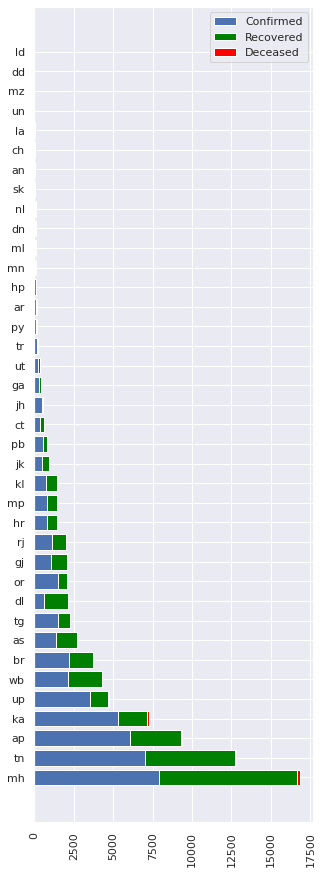

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=5, h=15)

covid['Total'] = covid.sum(axis=1)
covid.sort_values('Total', ascending=False, inplace=True,)

plt.barh(covid.index, covid.Confirmed,)
plt.barh(covid.index, covid.Recovered, left = covid.Confirmed, color='green')
plt.barh(covid.index, covid.Deceased, left = covid.Confirmed + covid.Recovered, color='red')
plt.xticks(rotation = 90)
plt.legend(covid.columns.unique())
;

## Time Varying Composition

### Stacked Area Plot

In [ ]:
mh = pd.DataFrame(data)

In [ ]:
mh = mh[['date','mh','status']]

In [ ]:
mh['mh'] = pd.to_numeric(mh['mh'])
mh['date'] = pd.to_datetime(mh['date'])

In [ ]:
mh_ = pd.pivot_table(mh, values='mh', index = 'date', columns='status',)

In [ ]:
mh_

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0
...,...,...,...
2020-07-23,9895,298,6484
2020-07-24,9615,278,5714
2020-07-25,9251,257,7227


In [ ]:
mh_new = pd.DataFrame(data = {'Confirmed':mh.iloc[::3]['mh'].values,
                              'Recovered':mh.iloc[1::3]['mh'].values,
                              'Deceased':mh.iloc[2::3]['mh'].values},
                              index=mh.iloc[::3]['date'])

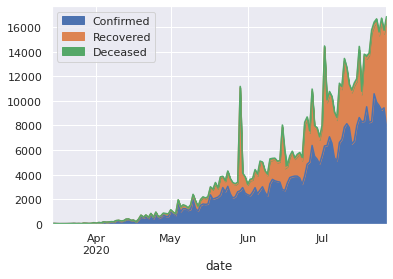

In [ ]:
mh_new.plot.area()

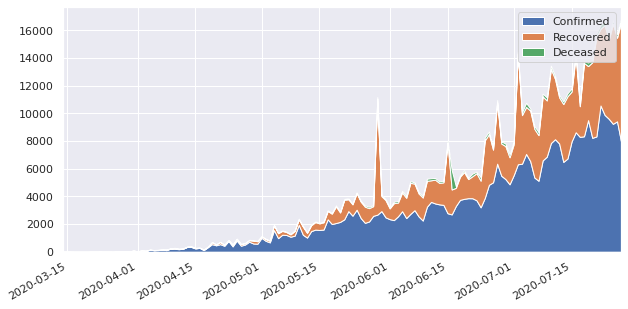

''

In [ ]:
fig = plt.gcf()
fig.set_size_inches(w=10,h=5)

plt.stackplot(mh_.index, mh_.Confirmed, mh_.Recovered, mh_.Deceased)
plt.legend(['Confirmed','Recovered','Deceased'])
# plt.xticks(rotation=30, ha='right')
# plt.xlim(pd.to_datetime(['2020-03-14', '2020-07-27']))
plt.xlim(mh_.index[0],mh_.index[-1])
fig.autofmt_xdate()
# plt.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()
;

In [ ]:
covid = pd.DataFrame(data)

In [ ]:
def stack_state(state):
    statedf = covid[['date',state,'status']]
    statedf[state] = pd.to_numeric(statedf[state])
    statedf['date'] = pd.to_datetime(statedf['date'])
    statedf = pd.pivot_table(statedf, values = state, columns = 'status', index = 'date')

    fig = plt.gcf()
    fig.set_size_inches(w=10,h=5)
    plt.xlim(statedf.index[0],statedf.index[-1])
    plt.stackplot(statedf.index, statedf.Confirmed, statedf.Recovered, statedf.Deceased)
    plt.legend(['Confirmed','Recovered','Deceased'])
    fig.autofmt_xdate()
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


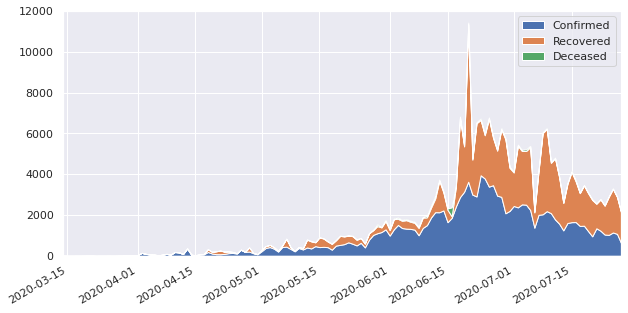

In [ ]:
stack_state('dl')

### Relative Stack Area Plot

In [ ]:
def state_change(state):
    statedf = covid[['date',state,'status']]
    statedf[state] = pd.to_numeric(statedf[state])
    statedf['date'] = pd.to_datetime(statedf['date'])
    statedf = pd.pivot_table(statedf, values = state, columns = 'status', index = 'date')

    fig = plt.gcf()
    fig.set_size_inches(w=10,h=5)
    plt.xlim(statedf.index[0],statedf.index[-1])
    plt.stackplot(statedf.index, statedf.Confirmed/statedf.sum(axis=1), statedf.Recovered/statedf.sum(axis=1), statedf.Deceased/statedf.sum(axis=1), colors=['#ff7f0e','#2ca02c', '#d62728'])
    plt.legend(['Confirmed','Recovered','Deceased'])
    fig.autofmt_xdate()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


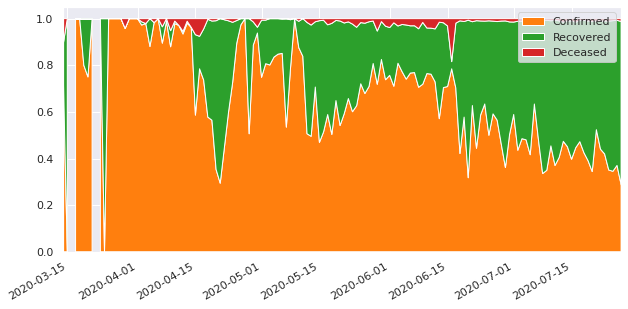

In [ ]:
state_change('dl')

# Plotting Relationship Between Data

In [ ]:
t = sns.load_dataset('tips')

###ScatterPlots

In [ ]:
t

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


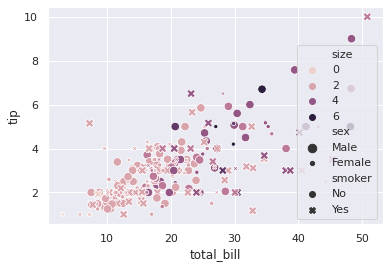

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='size',style='smoker', size='sex', )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location ''. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


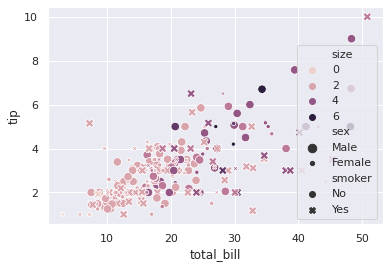

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='size',style='smoker', size='sex', )
plt.legend(loc='')

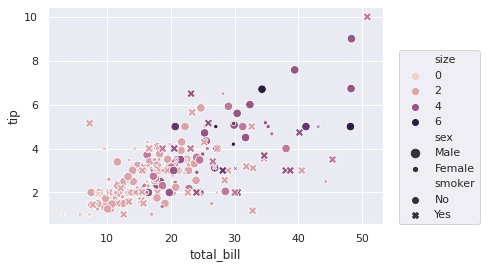

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='size',style='smoker', size='sex', )
plt.legend(loc=[1.05,0])

Continuous Data BarPlots

In [ ]:
d = sns.load_dataset('diamonds')

In [ ]:
data=d.sample(1000)

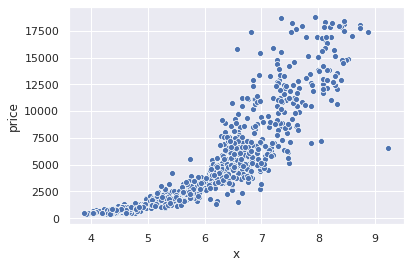

In [ ]:
sns.scatterplot(x='x', y='price',data=data)

###BarPlots

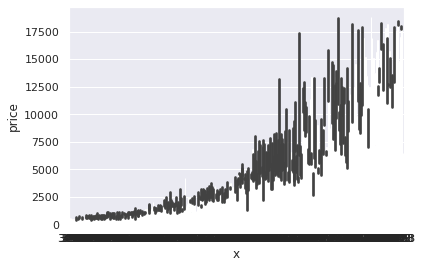

In [ ]:
sns.barplot(x='x',y='price',data=data)

In [ ]:
data['x_q'] = pd.cut(data['x'],bins=7, labels=False)

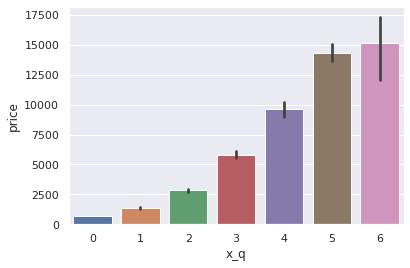

In [ ]:
sns.barplot(x='x_q',y='price',data=data)

In [ ]:
data['x_q'] = pd.cut(data['x'],bins=7)

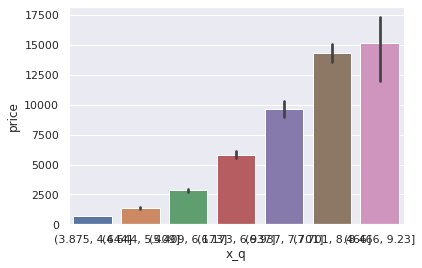

In [ ]:
sns.barplot(x='x_q',y='price',data=data)

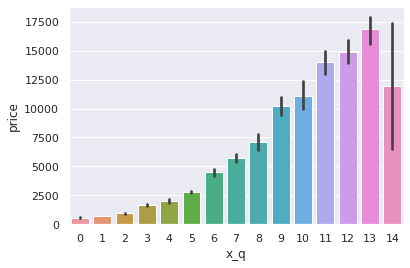

In [ ]:
data['x_q'] = pd.cut(data['x'],bins=15,labels=False)
sns.barplot(x='x_q',y='price',data=data)

###LinePlots

In [ ]:
f = sns.load_dataset('fmri')

In [ ]:
f

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


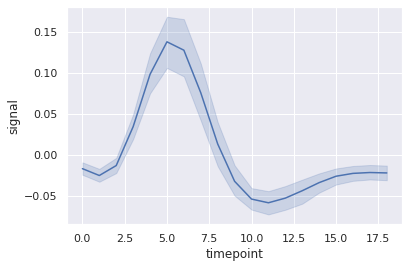

In [ ]:
sns.lineplot('timepoint','signal',data=f)

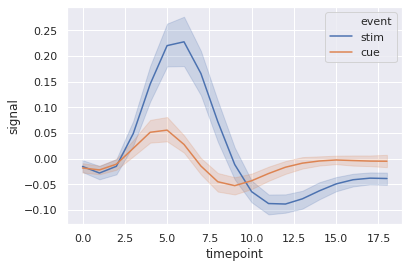

In [ ]:
sns.lineplot('timepoint','signal',data=f, hue = 'event')

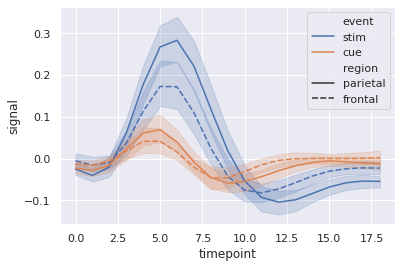

In [ ]:
sns.lineplot('timepoint','signal',data=f, hue = 'event', style = 'region')

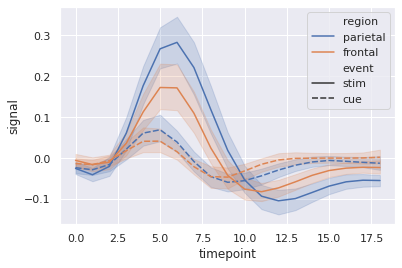

In [ ]:
sns.lineplot('timepoint','signal',data=f, style = 'event', hue = 'region')

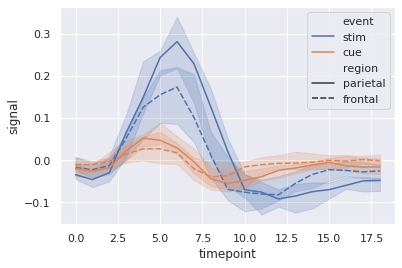

In [ ]:
sns.lineplot('timepoint','signal',data=f, hue = 'event', style = 'region', estimator = np.median)

In [ ]:
f_s = f.sample(50)

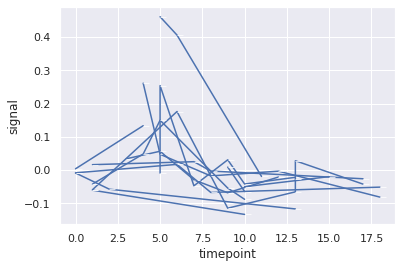

In [ ]:
sns.lineplot('timepoint','signal',data=f_s, units = 'subject', estimator = None, marker= True)

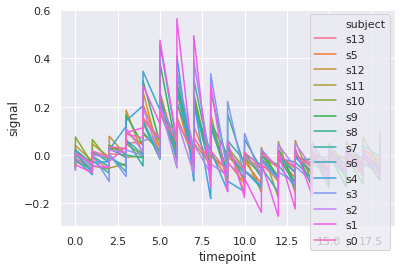

In [ ]:
sns.lineplot('timepoint','signal',data=f, hue = 'subject', estimator =None)

In [ ]:
x = np.arange(-50,40)

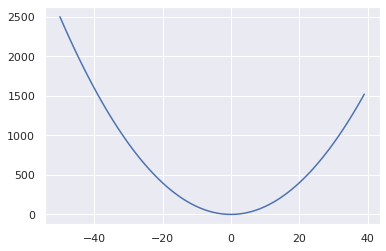

In [ ]:
sns.lineplot(x,x*x)

###Covid Confirmed

In [ ]:
covid

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,40,9113,42,1487,2900,11,222,11-Aug-20,0,727,41,272,1140,68,590,807,604,6473,1426,18,0,10014,12,33,922,0,12,1785,1055,177,1339,24,Recovered,1788,6005,213,56461,0,3865,169,3067
452,1,87,0,4,15,1,5,11-Aug-20,0,8,0,6,23,1,11,5,12,86,5,0,0,256,0,1,18,0,-1,12,32,2,11,0,Deceased,8,118,1,835,0,56,2,49
453,136,9597,103,4593,3741,81,567,12-Aug-20,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,Confirmed,1897,5871,110,67066,0,4475,454,2936
454,80,6676,25,2136,3029,8,269,12-Aug-20,0,1021,35,161,977,89,612,1642,544,7034,880,19,0,13408,7,76,643,7,128,1673,422,144,1249,16,Recovered,1920,5633,182,57759,0,4072,217,2725


In [ ]:
covid['date'] = pd.to_datetime(covid['date'])
covid.drop('tt', axis = 1, inplace=True)
covid.set_index('date', inplace= True)
covid = covid[covid['status']=='Confirmed']
covid.drop('status', axis=1, inplace= True)
covid = covid.apply(pd.to_numeric)
covid.reset_index(inplace= True)

In [ ]:
covid_ = pd.melt(covid, id_vars = 'date', 
                 value_vars = covid.columns[1:len(covid.columns)], 
                 var_name='state',value_name='confirmed')

In [ ]:
covid_['confirmed'] = pd.to_numeric(covid_['confirmed'])
covid['date'] = pd.to_datetime(covid_['date'])

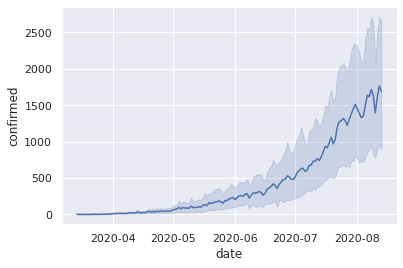

In [ ]:
sns.lineplot('date','confirmed', data=covid_)

In [ ]:
covid_s = covid_[covid_['state'].isin(['mh','dl','ka','gj','tn'])]

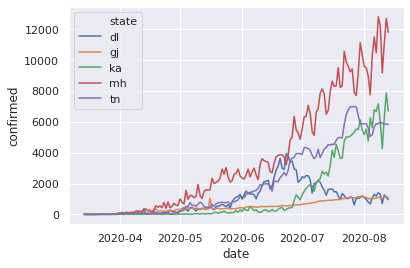

In [ ]:
sns.lineplot('date','confirmed', data=covid_s, hue = 'state')

In [ ]:
covid_s.sample(20)

###Covid Testing

In [ ]:
url = 'https://api.covid19india.org/state_test_data.json'
urlr.urlretrieve(url,'covid_test.json');
with open('covid_test.json') as f:
    test = json.load(f)
test = test['states_tested_data']
tests = pd.DataFrame(test)

In [ ]:
tests = tests[['state', 'testspermillion','totaltested','updatedon']]

In [ ]:
tests['testspermillion'] = pd.to_numeric(tests['testspermillion'])
tests['totaltested'] = pd.to_numeric(tests['totaltested'])
tests['updatedon'] = pd.to_datetime(tests['updatedon'], dayfirst=True);

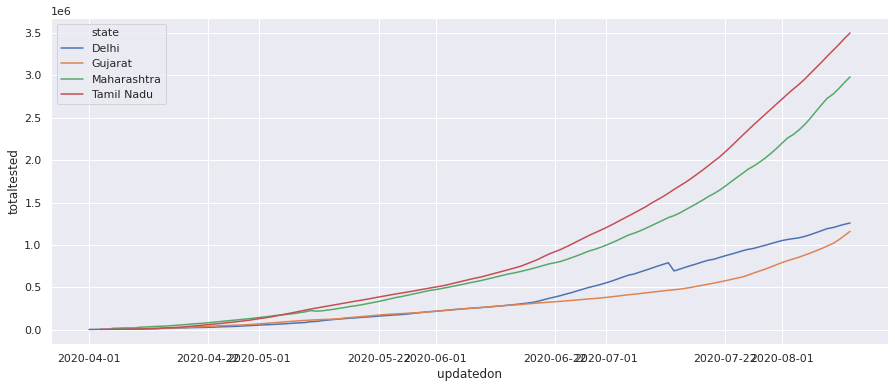

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('updatedon', 'totaltested', data=tests[tests.state.isin(['Delhi', 'Gujarat','Maharashtra', 'Tamil Nadu'])], hue='state')

In [ ]:
tests[tests.state.isin(['Delhi', 'Gujarat','Maharashtra', 'Tamil Nadu'])]

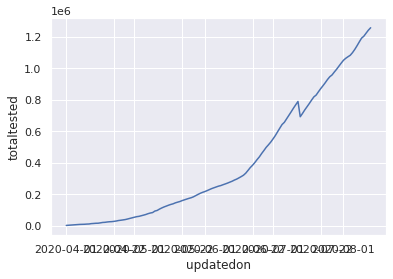

In [ ]:
sns.lineplot(data=tests[tests.state.isin(['Delhi'])], y='totaltested',x='updatedon')

In [ ]:
tests[tests.state.isin(['Delhi'])]

In [ ]:
tests['dailytest'] = tests['totaltested'].diff();

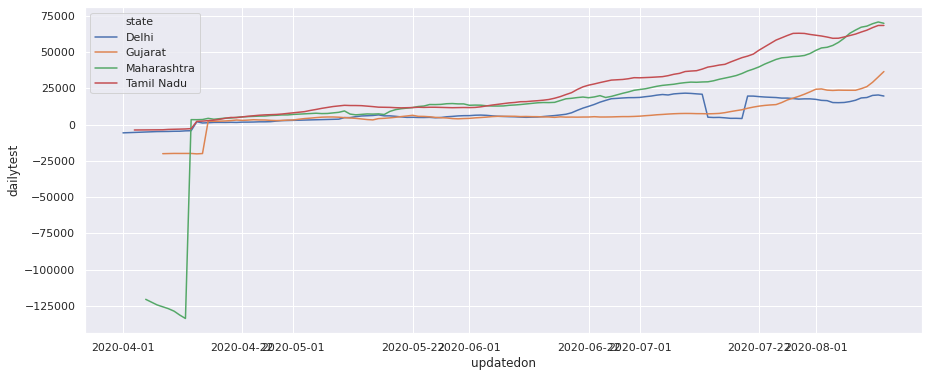

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('updatedon', 'dailytest', data=tests[tests.state.isin(['Delhi', 'Gujarat','Maharashtra', 'Tamil Nadu'])], hue='state')

In [ ]:
tests['dailytest'] = tests['dailytest'].rolling(7).mean()

In [ ]:
tests[tests.state.isin(['Tamil Nadu'])]

In [ ]:
tests['dailytest'].iloc[3434] = 3684 ;

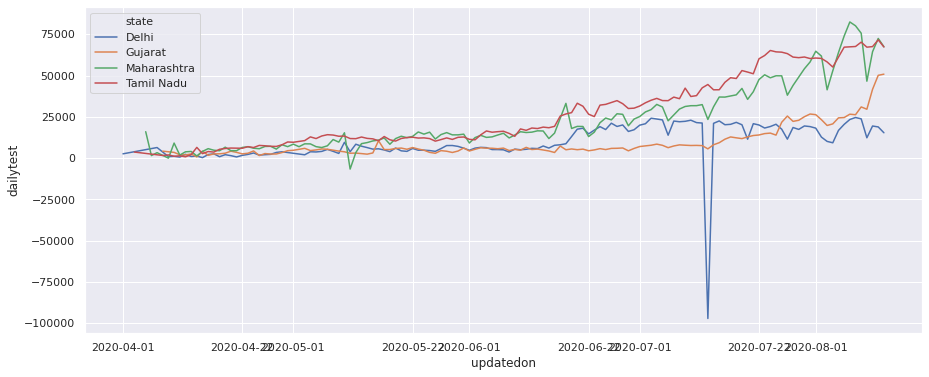

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('updatedon', 'dailytest', data=tests[tests.state.isin(['Delhi', 'Gujarat','Maharashtra', 'Tamil Nadu'])], hue='state')

In [ ]:
tests['dailytest'].iloc[1011]

20000.0

In [ ]:
name=''
for i,row in tests[tests['dailytest']<0].iterrows():
    if not name == row['state']:
        negs['dailytest'].loc[i] = row['totaltested']
        name = row['state']
tests[tests['dailytest']<0] = negs

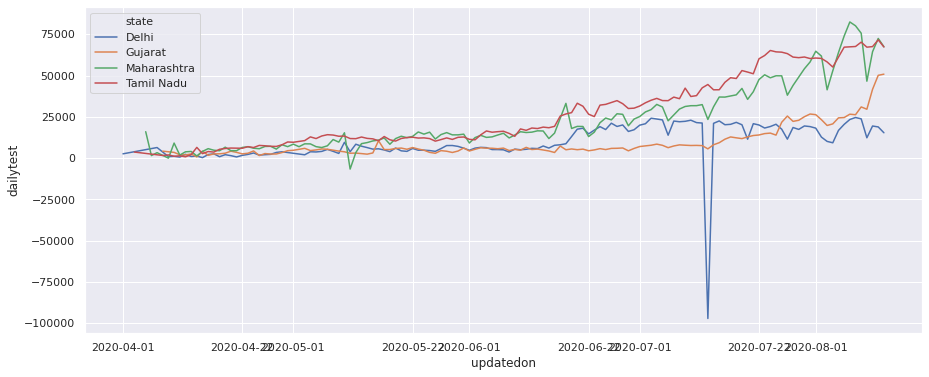

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('updatedon', 'dailytest', data=tests[tests.state.isin(['Delhi', 'Gujarat','Maharashtra', 'Tamil Nadu'])], hue='state')

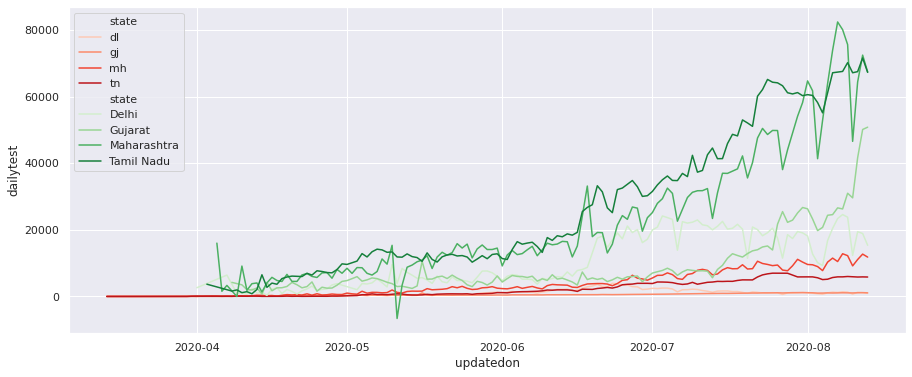

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','confirmed', data=covid_[covid_['state'].isin(['dl','gj','mh','tn'])], hue = 'state', palette='Reds',)
sns.lineplot('updatedon', 'dailytest', data=tests[tests.state.isin(['Delhi', 'Gujarat','Maharashtra', 'Tamil Nadu'])], hue='state', palette='Greens')

In [ ]:
fl = sns.load_dataset('flights')

In [ ]:
fl_ = fl.pivot(index='year', columns='month', values='passengers')

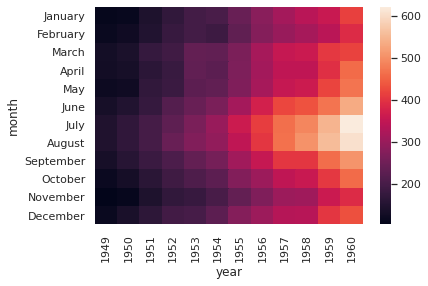

In [ ]:
sns.heatmap(fl_.T)

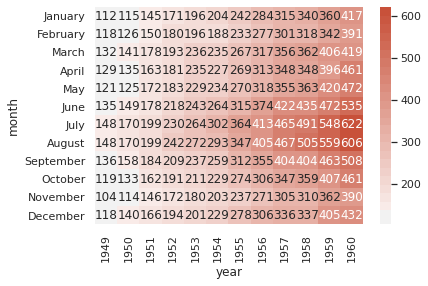

In [ ]:
sns.heatmap(fl_.T, cmap=sns.diverging_palette(5,18,n=50), center=fl_.loc[1949,'December'], annot=True, fmt='d',)

# Open End Problem

In [ ]:
url = 'https://api.covid19india.org/state_test_data.json'
urlr.urlretrieve(url,'ameo2015.xlsx');